###Data Prepration and Cleaning 

In [294]:
#load and inspect the data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [295]:
#Load the dataset
data = pd.read_csv('coffee_dataset_index.csv')
#display the first 3 dataset
data.head(3)




,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate


In [296]:
#to check the column names 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


###Handling Misiing values

In [298]:
#check for missing values
print(data.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [299]:
#there are 89 missing values in the card secton
#to fill the missing value we will make use fo fillna function
data.duplicated().sum()


0

In [300]:
#describe() function is used to provicde the statistical metrics for numeric column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


In [301]:
#desceibe function with categorical data
data.loc[:,['cash_type','card', 'coffee_name']].describe().T 

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


In [302]:
#let's check the transaction with missing value in 'card'
data[data['card'].isnull()]['cash_type'].value_counts()

cash_type
cash    89
Name: count, dtype: int64

All of the transaction with null card information are from cash

<Axes: >

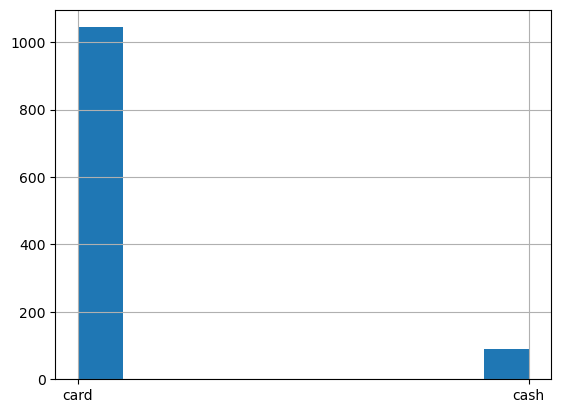

In [304]:
data['cash_type'].hist()

In [305]:
#
data['cash_type'].value_counts(normalize=True)

cash_type
card    0.921447
cash    0.078553
Name: proportion, dtype: float64

In [306]:
pd.DataFrame(data['coffee_name'].value_counts(normalize = True).sort_values(ascending=False).round(4)*100)
#this code will create a DataFrame showing the coffee names and their corresponding % occurance in the dataset sorted in descending order.
#most popular coffee as we can see is Americano with milk and the least Selling coffee is Cocoa

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


In [307]:
#Data Transforamtion 
#convert date and datetime to datetime format for better analysis of the data
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

In [308]:
#crerate column of month, weekdays and hour for analysing the data for month weekely and hourly
data['month']=data['date'].dt.strftime('%Y-%m')
data['day']=data['date'].dt.strftime('%w')
data['hour'] = data['date'].dt.strftime('%H')

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [310]:
data.head(3)

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,5,00
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,00
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,00


In [311]:
[data['date'].min(), data['date'].max()]
#this is useful for understanding the range of dates in our dataset which can help 
#when you're analyzing time periods or resampling the data

[Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00')]

In [312]:
#lets check the overall revenue bu the products
revenue_data = data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money', ascending=False)

Text(0.5, 0, 'Revenue')

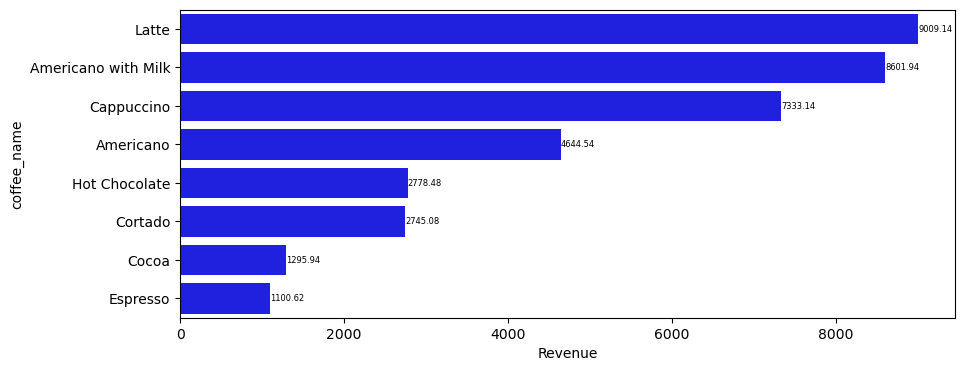

In [313]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data = revenue_data, x = 'money', y='coffee_name', color = 'blue')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Revenue')

Latte is the product with the highest revenue, while expresso is the one at the bottom

In [315]:
#Monthly Sales
monthly_sales=data.groupby(['coffee_name', 'month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month', columns='coffee_name', values = 'count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03,36,34,20,6,30,10,22,48
1,2024-04,35,42,43,6,19,7,13,31
2,2024-05,48,58,55,9,17,8,14,58
3,2024-06,14,69,46,5,19,10,14,50
4,2024-07,36,65,32,9,14,14,11,56


In [316]:
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


([<matplotlib.axis.XTick at 0x15c93115610>,
 [Text(0, 0, '2024-03'),
  Text(1, 0, '2024-04'),
  Text(2, 0, '2024-05'),
  Text(3, 0, '2024-06'),
  Text(4, 0, '2024-07')])

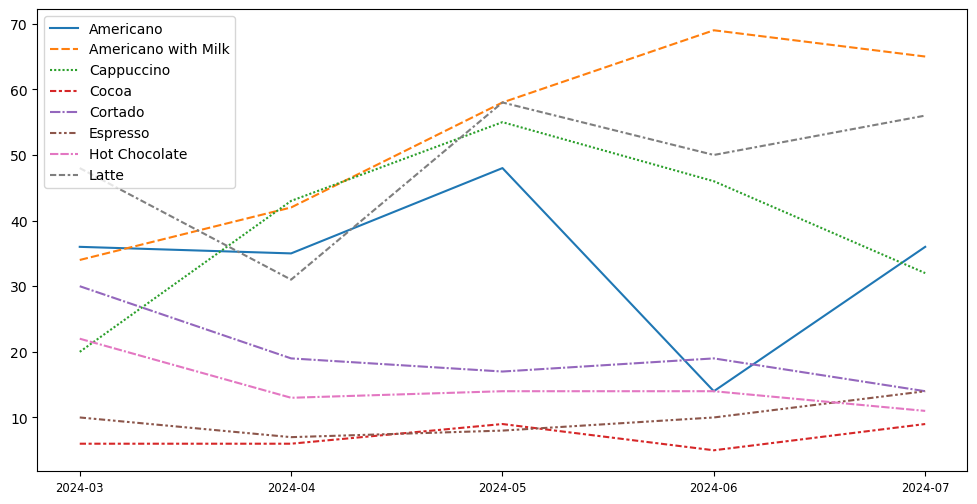

In [317]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])), monthly_sales['month'], size='small')

As shown in the line chart above, Americano with Milk and Latte, and Cappuccino are top selling coffee
types, while Cocoa and Expresso have lowest sales. Additionally, Americano with Milk and Latte show an
upward trending

In [319]:
#Weekday sales
weekday_sales = data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


([<matplotlib.axis.XTick at 0x15c9a1ecb00>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thu'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

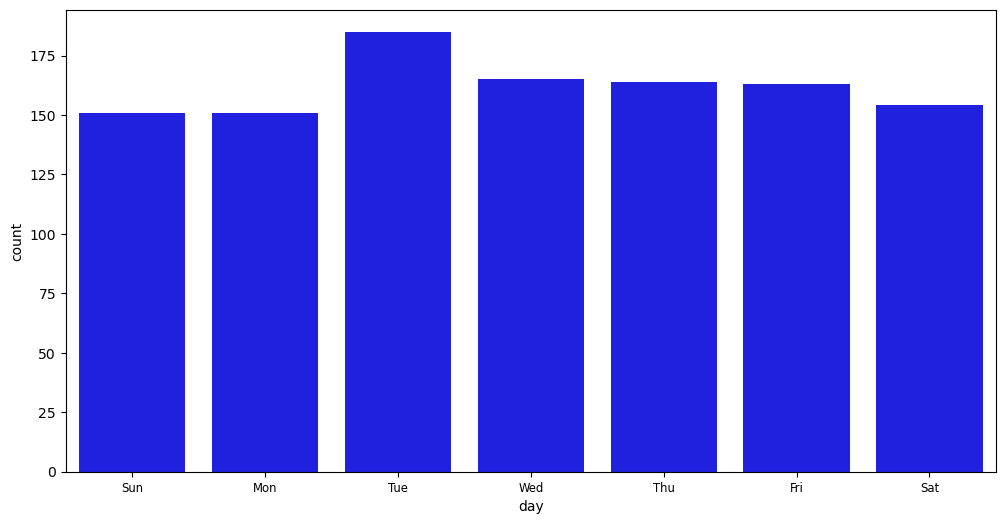

In [320]:
plt.figure(figsize=(12,6))
sns.barplot(data = weekday_sales, x = 'day', y ='count', color = 'blue')
plt.xticks(range(len(weekday_sales['day'])), ['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], size='small')

The bar chart reveal that tuesday has the highest sales of the week, while sales on the other days are relatively similar

In [322]:
daily_sales = data.groupby(['coffee_name', 'date']).count()['datetime'].reset_index().reset_index().rename(columns={'datetime':'count'}).pivot(index='date', columns='coffee_name', values='count').reset_index().fillna(0)
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [323]:
daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.0,5.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,2.0
Cortado,0.0,4.0
Espresso,0.0,4.0
Hot Chocolate,0.0,4.0
Latte,0.0,7.0


This table provide us the information of how many of each products can be sold in each day

In [325]:
# Group by 'hour' and 'coffee_name', and count the number of sales for each
hourly_sales_detailed = (
    data.groupby(['hour', 'coffee_name'])  # Group by both hour and coffee_name
    .count()['date']  # Count the occurrences of the 'date' column (which represents transactions/sales)
    .reset_index()  # Reset the index to have 'hour' and 'coffee_name' as columns
    .rename(columns={'date': 'count'})  # Rename 'date' to 'count'
)

# Display the detailed hourly sales DataFrame
hourly_sales_detailed

,hour,coffee_name,count
0,00,Americano,169
1,00,Americano with Milk,268
2,00,Cappuccino,196
3,00,Cocoa,35
4,00,Cortado,99
5,00,Espresso,49
6,00,Hot Chocolate,74
7,00,Latte,243


In [326]:
hourly_sales_detailed.dtypes

hour           object
coffee_name    object
count           int64
dtype: object

In [327]:
hourly_sales_detailed['hour'] = pd.to_numeric(hourly_sales_detailed['hour'], errors='coerce')


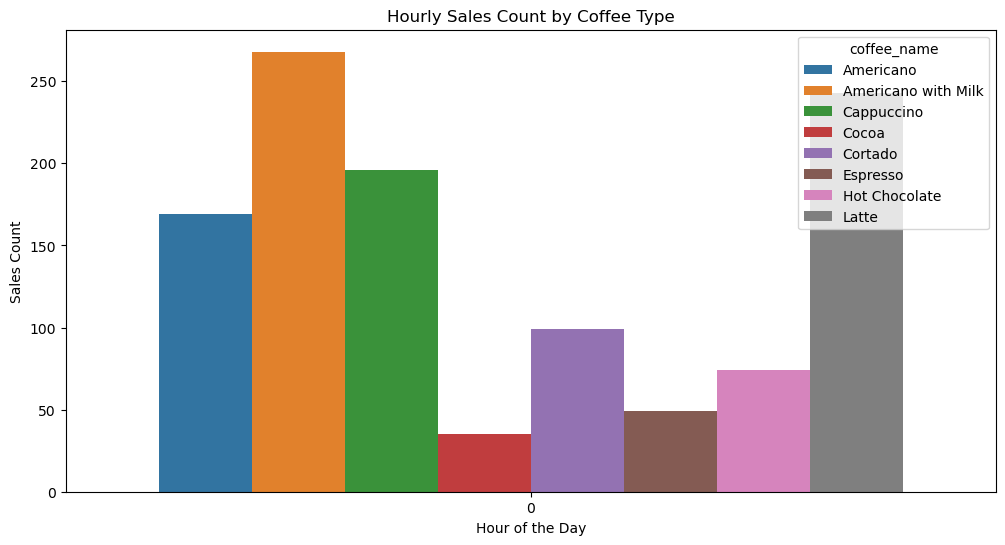

In [359]:
plt.figure(figsize=(12, 6))

# Bar plot with 'coffee_name' distinction
sns.barplot(data=hourly_sales_detailed, x='hour', y='count', hue='coffee_name')

plt.xlabel('Hour of the Day')
plt.ylabel('Sales Count')
plt.title('Hourly Sales Count by Coffee Type')

plt.show()


In [401]:
#hourly sales
hourly_sales_by_coffee = data.groupby(['hour', 'coffee_name'])['sales'].sum().unstack().fillna(0)


KeyError: 'Column not found: sales'

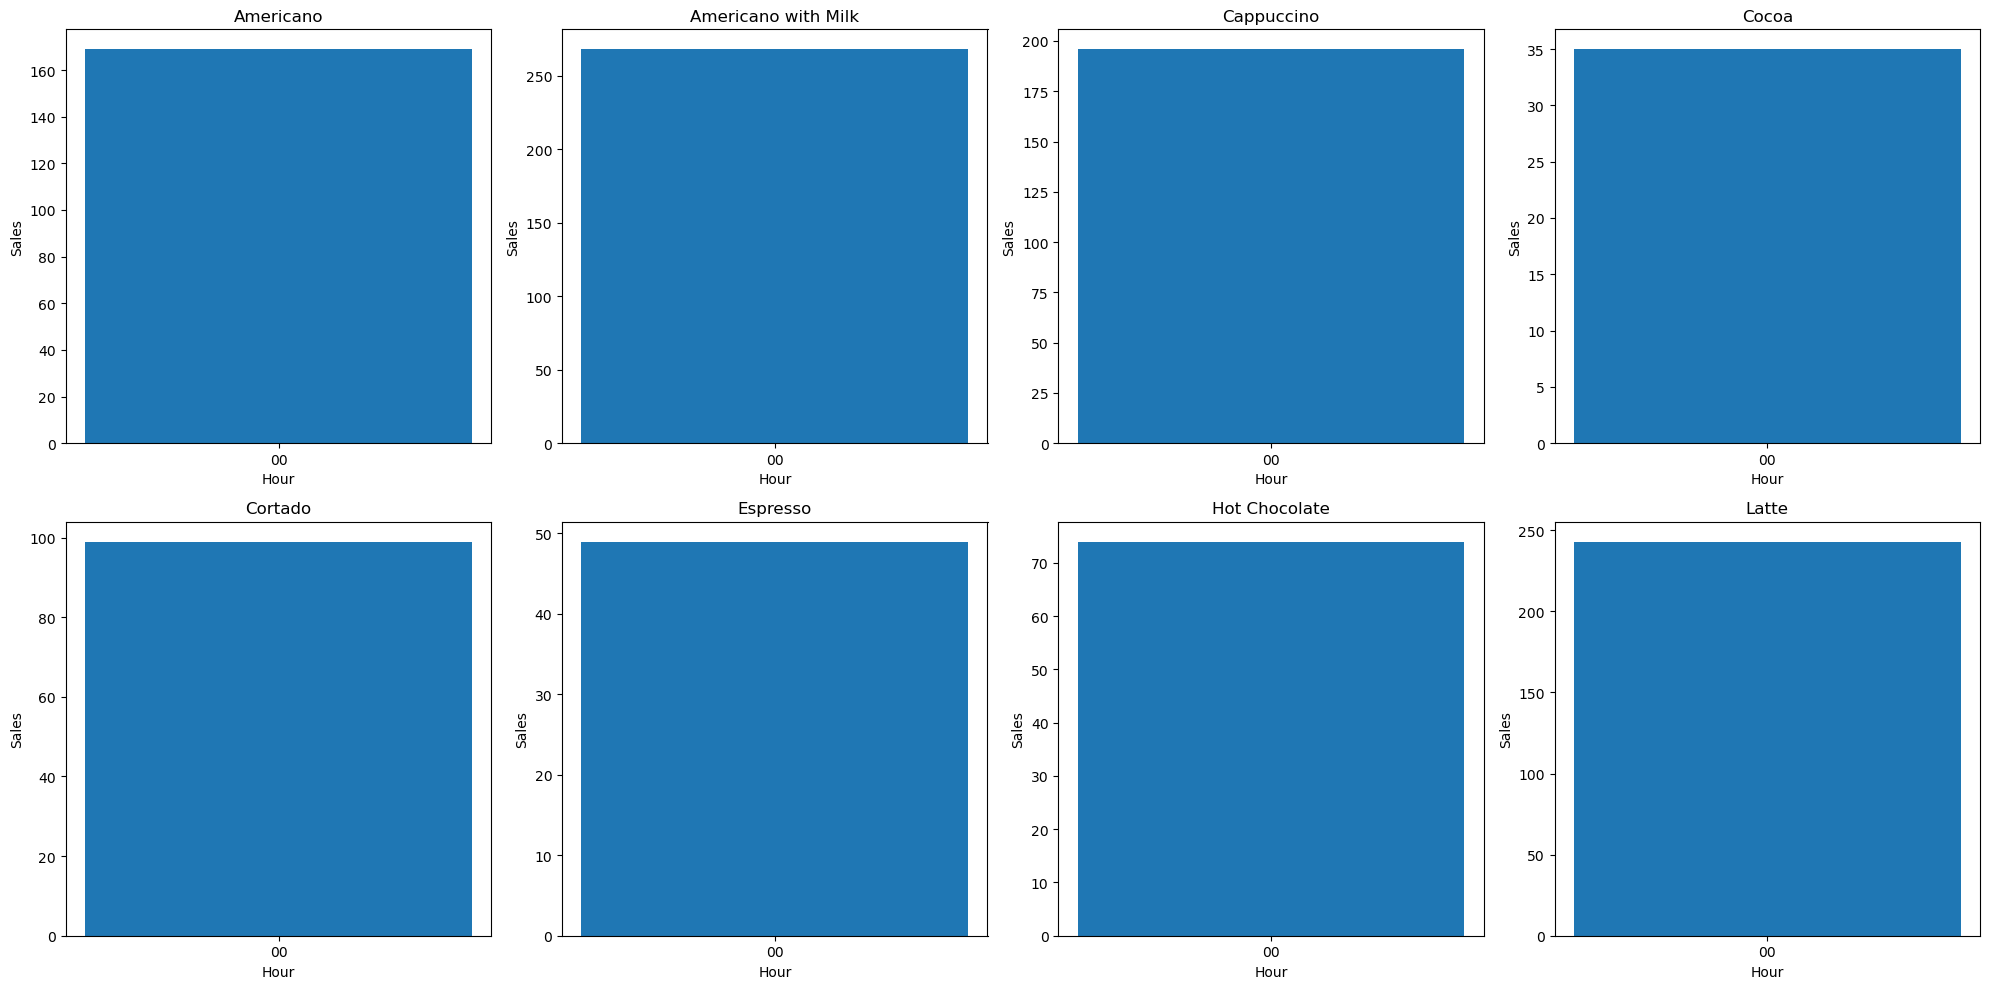

NameError: name 'coffee_data' is not defined

In [397]:
# Assuming hourly_sales_by_coffee contains correct grouped data by 'hour' and 'coffee_name'
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the array of subplots for easy iteration
axs = axs.flatten()

# Loop through each column in the DataFrame, skipping the 'Index' column
for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):  # Skip the first 'hour' column
    axs[i].bar(hourly_sales_by_coffee['hour'], hourly_sales_by_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Sales')  # Enable the y-axis label for better readability

plt.tight_layout()

# Show the plot
plt.show()
